In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
def read_dataset():
    global data
    df = pd.read_excel('data1.xlsx')
    df = df.drop_duplicates()
    data = df.values
    df = df.drop(['label'], axis = 1)
    df = df.values
    return df

In [3]:
def root(x, idx):
    while x!=idx[x]:
        idx[x] = idx[idx[x]]
        x = idx[x]
    return x 

In [4]:
idx = []
eps = 1
minPoints = 10

dset = read_dataset()

[idx.append(k) for k in range(0, dset.shape[0])]

for i in range(dset.shape[0]):
    
    cnt = 0
    
    for j in range(dset.shape[0]):
        if np.linalg.norm(dset[i] - dset[j]) <= eps:
            cnt += 1
    
    if cnt >= minPoints:
        for j in range(dset.shape[0]):
            if np.linalg.norm(dset[i] - dset[j]) <= eps:
                idx[j] = root(i, idx)

for k in range(dset.shape[0]):
    idx[k] = root(k, idx)
print(np.unique(idx))
print((np.unique(idx)).shape)

[13 18]
(2,)


In [5]:
one = []
two = []
for i in range(dset.shape[0]):
    if idx[i] == 13:
        one.append(dset[i])
    else:
        two.append(dset[i])

one = np.array(one)
two = np.array(two)
import matplotlib.pyplot as plt
plt.plot(one[:,0], one[:,1], 'ro')
plt.plot(two[:,0], two[:,1], 'bo')

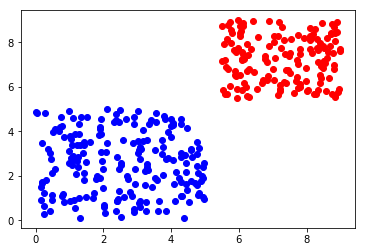

In [6]:
one = []
two = []

for i in range(data.shape[0]):
    if data[i][2] == -1:
        one.append(dset[i])
    else :
        two.append(dset[i])

one = np.array(one)
two = np.array(two)
import matplotlib.pyplot as plt
plt.plot(one[:,0], one[:,1], 'ro')
plt.plot(two[:,0], two[:,1], 'bo')